## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[512,256,128,128,64], drop_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation='relu', 
                                   name='hidden_layer'+str(i+1))(input_layer)
            x = Dropout(drop_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation='relu', 
                                   name='hidden_layer'+str(i+1))(x)
            x = Dropout(drop_ratio)(x)
    out = keras.layers.Dense(units=output_units, activation='softmax')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""
設定超參數
"""
Learning_rate = 1e-3
Epochs = 50
Batch_size = 256
Dropout_EXP = 0.15

In [7]:
results = {}
"""
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(x_train.shape[1:], drop_ratio=Dropout_EXP)
model.summary()
optimizer = keras.optimizers.Adam(lr=Learning_rate)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train,
          epochs=Epochs,
          batch_size=Batch_size,
          validation_data=(x_test, y_test),
          shuffle=True)

train_loss = model.history.history['loss']
valid_loss = model.history.history['val_loss']
train_acc = model.history.history['accuracy']
valid_acc = model.history.history['val_accuracy']

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0   

50000/50000 [==============================] - 6s 110us/step - loss: 1.4134 - accuracy: 0.4956 - val_loss: 1.4106 - val_accuracy: 0.5056
Epoch 42/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.4016 - accuracy: 0.5024 - val_loss: 1.4045 - val_accuracy: 0.4993
Epoch 43/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.3997 - accuracy: 0.5011 - val_loss: 1.4092 - val_accuracy: 0.5041
Epoch 44/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.3917 - accuracy: 0.5034 - val_loss: 1.4028 - val_accuracy: 0.5074
Epoch 45/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.3851 - accuracy: 0.5083 - val_loss: 1.3828 - val_accuracy: 0.5086
Epoch 46/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.3871 - accuracy: 0.5085 - val_loss: 1.4023 - val_accuracy: 0.4962
Epoch 47/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.3789 - accuracy: 0.5069 - val_loss:

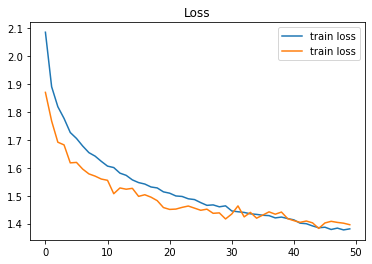

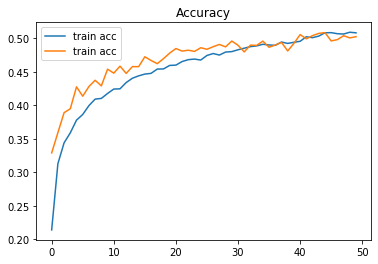

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""
將結果繪出
"""
plt.plot(range(len(train_loss)), train_loss, label='train loss')
plt.plot(range(len(valid_loss)), valid_loss, label='train loss')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_loss)), train_acc, label='train acc')
plt.plot(range(len(valid_loss)), valid_acc, label='train acc')
plt.legend()
plt.title("Accuracy")
plt.show()